In [ ]:
pip install padasip

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import padasip as pa
import librosa as librosa
import IPython.display as ipd
import soundfile as sf

In [ ]:
# load samples
def display (original_sound, name):
  plt.title(name)
  plt.plot(original_sound)
  plt.show()

In [ ]:
sound = "/content/natalia_brawn_normal_2024-01-19_13.09.18.processed.wav"

In [ ]:
# filtering
def filtering(original_sound, order):
  n = order
  x = pa.input_from_history(original_sound, n)[:-1]
  original_sound = original_sound[n:]
  #u = u[n:]
  f = pa.filters.FilterRLS(mu=0.9, n=n)
  y, e, w = f.run(original_sound, x)

  # error estimation
  MSE_d = np.dot(original_sound-y, original_sound-y) / float(len(original_sound))
  MSE_y = np.dot(y-y, y-y) / float(len(original_sound))

  # results
  #plt.figure(figsize=(12.5,6))
  #plt.plot(original_sound, "r:", linewidth=4, label="original")
  plt.subplot(2,1,1)
  plt.plot(original_sound)
  plt.title("original sound")
  plt.subplot(2,1,2)
  plt.plot(y, "g", label="filtered, MSE: {}".format(MSE_d))
  plt.title("filtered signal")
  plt.legend()
  plt.tight_layout(pad=5.0)
  plt.show()
  #plt.xlim(N-100,N)
  return y

In [ ]:
sound, sample_rate = librosa.load(sound)

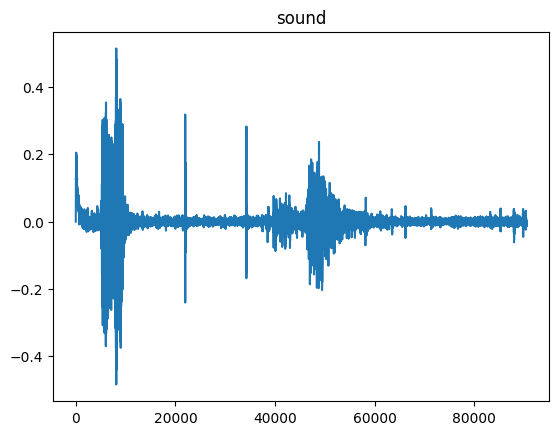

In [ ]:
display(sound, "sound")

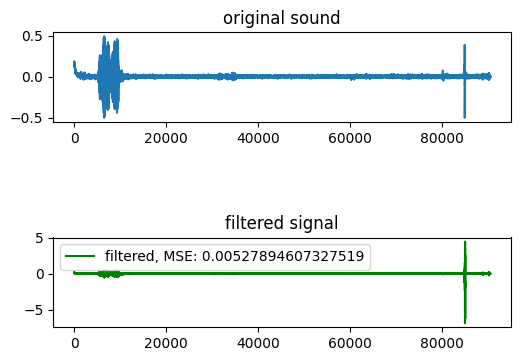

In [ ]:
filtered_sound = filtering(sound, 100)

In [ ]:
#listen to sample
ipd.Audio(sound, rate=22050)

In [ ]:
ipd.Audio(filtered_sound, rate=22050)